In [1]:
%load_ext autoreload

%autoreload 2

import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle
from os.path import join

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams["image.composite_image"]=False
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.linalg
from numpy.fft import rfft, irfft, fft, ifft

import multiprocessing
import concurrent.futures
from astropy.io import fits

import psrchive
import residuals

import pipe
from pipe import rotate_phase, convert_template, align_profile, align_scale_profile

import template_match as tm

plt.viridis()

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [15]:
#files = sorted(glob("data/raw/GBT/new/guppi_57825_0337+17_0002_*.fits"))
files = sorted(glob("data/raw/GBT/new/guppi_57591_0337+17_0005_*.fits"))


In [20]:
for f in files:
    hdulist = fits.open(f)
    freqs = hdulist['SUBINT'].data['DAT_FREQ']
    df = np.diff(freqs,axis=1)
    print np.amin(freqs), np.amax(freqs), np.amin(df), np.amax(df), freqs.shape[1]

1200.0 1898.4375 1.5625 1.5625 448
1200.0 1898.4375 1.5625 1.5625 448
1200.0 1898.4375 1.5625 1.5625 448
1200.0 1898.4375 1.5625 1.5625 448
1200.0 1898.4375 1.5625 1.5625 448
1200.0 1898.4375 1.5625 1.5625 448
1200.0 1898.4375 1.5625 1.5625 448


In [17]:
hdulist = fits.open(files[0])
cf = hdulist[0].header['OBSFREQ']
bw = hdulist[0].header['OBSBW']
nchan_o = hdulist[0].header['OBSNCHAN']
nchan = hdulist['SUBINT'].header['NCHAN']
chan_bw = hdulist['SUBINT'].header['CHAN_BW']
freqs = hdulist['SUBINT'].data['DAT_FREQ']

print(cf, bw, nchan, bw/nchan, chan_bw)
print(cf-bw/2, cf+bw/2)
print(cf-bw/2+chan_bw/2, cf+bw/2-chan_bw/2)
print(cf-bw/2, cf+bw/2-chan_bw)
print(freqs[0,0], freqs[0,-1])


(1550.0, 800.0, 448, 1.7857142857142858, 1.5625)
(1150.0, 1950.0)
(1150.78125, 1949.21875)
(1150.0, 1948.4375)
(1200.0, 1898.4375)


In [18]:
hdulist['subint'].header

XTENSION= 'BINTABLE'           / ***** Subintegration data  *****               
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =              3689828 / width of table in bytes                        
NAXIS2  =                  128 / Number of rows in table (NSUBINT)              
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   20 / Number of fields per row                       
TTYPE1  = 'INDEXVAL'           / Optionally used if INT_TYPE != TIME            
TFORM1  = '1D      '           / Double                                         
TTYPE2  = 'TSUBINT '           / Length of subintegration                       
TFORM2  = '1D      '           / Double                                         
TTYPE3  = 'OFFS_SUB'        

In [14]:
chan_bw/2

0.78125

In [21]:
import shlex

In [25]:
s = r"a b 'c \' d'"
print s
shlex.split(s)

a b 'c \' d'


ValueError: No closing quotation

In [26]:
shlex.split("   \n")

[]

(1100.0, 1898.4375)

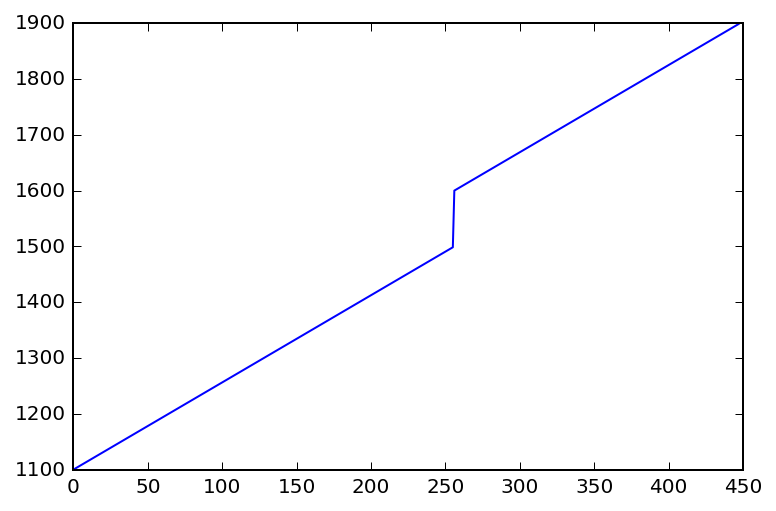

In [31]:
H = fits.open("/data/archibald/scratch/pat-test/guppi_57825_0337+17_0002_0017.tscr")
d = H["SUBINT"].data["DAT_FREQ"][0]
plt.plot(d)
d[0], d[-1]

In [35]:
w = H["SUBINT"].data['DAT_WTS'][0]
w[0], w[-1]

(1745.6196, 1745.6196)

In [36]:
np.all(w==w[0])

True

In [37]:
len(w)

448